<a href="https://colab.research.google.com/github/proteenteen/Artificial-intelligence-AI-/blob/main/AI_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from networkx.algorithms.bipartite import projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)

food = ctrl.Antecedent(universe,'Food')
service = ctrl.Antecedent(universe,'Service')
tip = ctrl.Consequent(universe1,'Tip')

name = ['Very Poor','Poor','Average','Good','Very Good']
food.automf(names=name)
service.automf(names =name)
tip.automf(names = name)

#food.view()
#service.view()


rule1 = ctrl.Rule(antecedent=((food['Very Poor']&service['Very Poor'])|(food['Poor']&service['Very Poor'])|(food['Poor']&service['Poor'])|(food['Very Poor']&service['Poor'])),consequent=tip['Very Poor'],label='rule VP')
rule2 = ctrl.Rule(antecedent=((food['Very Poor']&service['Average'])|(food['Very Poor']&service['Good'])|(food['Very Poor']&service['Very Good'])|(food['Poor']&service['Average']|(food['Poor']&service['Good'])|(food['Average']&service['Very Poor'])|(food['Average']&service['Poor'])|(food['Good']&service['Very Poor'])|(food['Good']&service['Poor'])|(food['Very Good']&service['Very Poor']))),consequent=tip['Poor'],label='rule P')
rule3 = ctrl.Rule(antecedent=((food['Poor']&service['Very Good'])|(food['Average']&service['Average'])|(food['Very Good']&service['Poor'])),consequent=tip['Average'],label='rule A')
rule4 = ctrl.Rule(antecedent=((food['Average']&service['Good'])|(food['Average']&service['Very Good'])|(food['Good']&service['Average'])|(food['Good']&service['Good'])|(food['Very Good']&service['Average'])),consequent=tip['Good'],label='rule G')
rule5 = ctrl.Rule(antecedent=((food['Good']&service['Very Good'])|(food['Very Good']&service['Good'])|(food['Very Good']&service['Very Good'])),consequent=tip['Very Good'],label='rule VG')

tipping_ctrl= ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5])
sim= ctrl.ControlSystemSimulation(tipping_ctrl,flush_after_run=61*61+1)
upsampled = np.linspace(0,10,61)

x,y, = np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['Food']=x[i,j]
    sim.input ['Service']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['Tip']

fig = plt.figure(figsize=(8,8))
ax =fig.add_subplot(111,projection='3d')

suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)

cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)

ax.view_init(30,300)

<ipython-input-34-398ab78b7d6a>:60: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-34-398ab78b7d6a>:61: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-34-398ab78b7d6a>:62: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


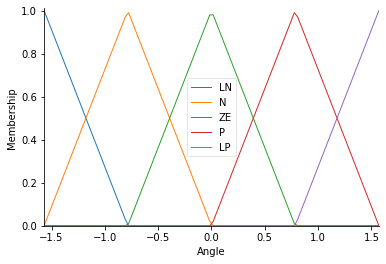

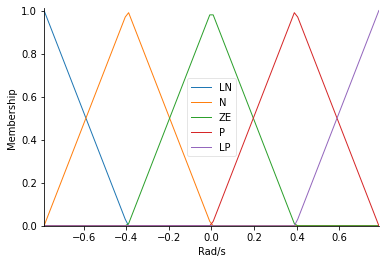

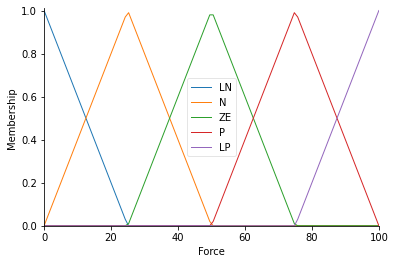

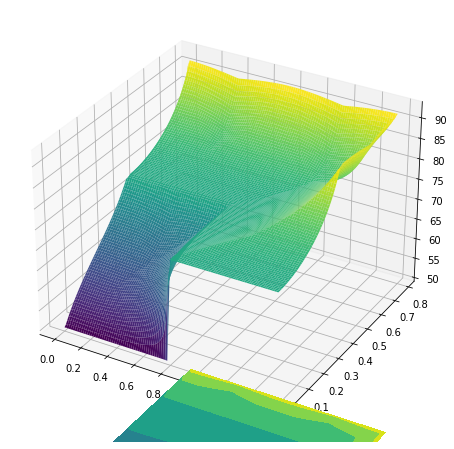

In [34]:
from networkx.algorithms.bipartite import projection
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math 

universe = np.linspace(-3.14/2,3.14/2,100)
universe1 = np.linspace(-3.14/4,3.14/4,100)
universe2 = np.linspace(0,100,100)

rad = ctrl.Antecedent(universe,'Angle')
rad_s = ctrl.Antecedent(universe1,'Rad/s')
Force = ctrl.Consequent(universe2,'Force')

names=['LN','N','ZE','P','LP']

rad.automf(names=names)
rad_s.automf(names=names)
Force.automf(names=names)

rad.view()
rad_s.view()
Force.view()

rule1=ctrl.Rule(antecedent=((rad['LN']&rad_s['LN'])|(rad['LN']&rad_s['N'])|(rad['ZE']&rad_s['N'])
                            |(rad['P']&rad_s['LN'])),consequent=Force['LN'],label='Rule LN')

rule2=ctrl.Rule(antecedent=((rad['LN']&rad_s['ZE'])|(rad['LN']&rad_s['P'])|(rad['LP']&rad_s['LN'])
                            |(rad['N']&rad_s['N'])|(rad['N']&rad_s['LN'])|(rad['N']&rad_s['ZE'])|(rad['N']&rad_s['P'])),consequent=Force['N'],label='Rule N')

rule3=ctrl.Rule(antecedent=((rad['N']&rad_s['LP'])|(rad['ZE']&rad_s['ZE'])),consequent=Force['ZE'],label='Rule ZE')

rule4=ctrl.Rule(antecedent=((rad['ZE']&rad_s['P'])|(rad['P']&rad_s['P'])|(rad['LP']&rad_s['LN'])
                            |(rad['LP']&rad_s['N'])|(rad['LP']&rad_s['ZE'])),consequent=Force['P'],label='Rule P')

rule5=ctrl.Rule(antecedent=((rad['ZE']&rad_s['LP'])|(rad['P']&rad_s['LP'])|(rad['P']&rad_s['LP'])
                            |(rad['LP']&rad_s['P'])|(rad['LP']&rad_s['LP'])),consequent=Force['LP'],label='Rule LP')


Force_ctrl= ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5])
sim= ctrl.ControlSystemSimulation(Force_ctrl,flush_after_run=100*100+1)

upsampled = np.linspace(0,3.14/2,100)
unsampled1 =np.linspace(0,3.14/4,100)
x,y = np.meshgrid(upsampled,unsampled1)
z = np.zeros_like(x)

for i in range(100):
  for j in range(100):
    sim.input['Angle']=x[i,j]
    sim.input ['Rad/s']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['Force']

fig = plt.figure(figsize=(8,8))
ax =fig.add_subplot(111,projection='3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)

ax.view_init(30,300)